<a href="https://colab.research.google.com/github/LuizVicenteJr/analise_atendimentos_educacionais_streamlit/blob/main/projeto_planetario_versao1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.0 IMPORTS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 0.1 DADOS

In [ ]:
data = pd.read_csv('/content/ad_planetario.csv')

# 1.0 DESCRIÇÃO DOS DADOS

## 1.1 RENOMEAR COLUNAS

In [ ]:
print(data.columns)
print(len(data.columns))

Index(['Carimbo de data/hora', 'Confirmação co-host', 'Data', 'Horário',
       'Host', 'Co-host', 'Nome da Escola', 'Município', 'Estado',
       'Urbana ou rural', 'Pública ou privada', 'Público', 'Público total',
       'Observações: (caso tenha algum problema na sessão, escreva aqui)',
       'Outra escolas na mesma sessão?', 'Nome da escola ', 'Público ',
       'Total de público', 'Município ', 'Estado ', 'Urbana ou rural ',
       'Pública ou privada ', 'Outra escolas na mesma sessão?.1',
       'Nome da escola .1', 'Público .1', 'Total de público.1', 'Município .1',
       'Estado .1', 'Urbana ou rural .1', 'Pública ou privada .1',
       'Comentários?', 'Nome da escola .2', 'Público .2', 'Total de público.2',
       'Município .2', 'Estado .2', 'Urbana ou rural .2',
       'Pública ou privada .2', 'Comentários?.1', 'Nome da escola .3',
       'Público .3', 'Total de público.3', 'Município .3', 'Estado .3',
       'Urbana ou rural .3', 'Pública ou privada .3', 'Comentários?.2',

In [ ]:
renomear_colunas = {
    'Carimbo de data/hora' : 'carimbo',
    'Confirmação co-host' : 'confirmação',
    'Data': 'data',
    'Horário': 'horário',
    'Host' : 'host',
    'Co-host' : 'co-host',
    'Nome da Escola': 'escola',
    'Município' : 'municipio',
    'Estado' : 'estado',
    'Urbana ou rural' : 'urbana_rural',
    'Pública ou privada' : 'publico_privada',
    'Público' : 'segmento', 
    'Público total': 'publico_total',
    'Observações: (caso tenha algum problema na sessão, escreva aqui)' : 'observações',
    'Outra escolas na mesma sessão?' : 'outra_escola',
    'Nome da escola ' :'escola_2',
    'Público ': 'segmento_2',
    'Total de público' : 'publico_total_2',
    'Município ' : 'municipio_2',
    'Estado ' : 'estado_2',
    'Urbana ou rural ' : 'urbana_rural_2',
    'Pública ou privada ' : 'publico_privada_2',
    'Outra escolas na mesma sessão?.1': 'outra_escola_2',
    'Nome da escola .1' : 'escola_3', 
    'Público .1' : 'segmento_3',
    'Total de público.1' : 'publico_total_3',
    'Município .1' : 'municipio_3',
    'Estado .1' : 'estado_3',
    'Urbana ou rural .1' : 'urbana_rural_3',
    'Pública ou privada .1' : 'publica_privada_3',
    'Comentários?' : 'observações_2',
    'Nome da escola .2' :'escola_4',
    'Público .2' : 'segmento_4',
    'Total de público.2' : 'publico_total_4',
    'Município .2' : 'municipio_4',
    'Estado .2' : 'estado_4',
    'Urbana ou rural .2' : 'urbana_rural_4',
    'Pública ou privada .2' : 'publica_privada_4',
    'Comentários?.1' : 'observações_3',
    'Nome da escola .3' : 'escola_4',
    'Público .3' : 'segmento_5', 
    'Total de público.3' : 'publico_total_5',
    'Município .3' : 'municipio_5',
    'Estado .3' : 'estado_5',
    'Urbana ou rural .3' : 'urbana_rural_5',
    'Pública ou privada .3' : 'publico_privada_5',
    'Comentários?.2' : 'observações_4',
    'Outra escolas na mesma sessão?.2' : 'outra_escola_3',
    'Outra escolas na mesma sessão?.3' : 'outra_escola_4',
    'Público TOTAL da sessão' : 'total'
}

# Renomear as colunas no DataFrame
df1 = data.rename(columns=renomear_colunas)


In [ ]:
pd.set_option('display.max_columns', None)
df1.head()

,carimbo,confirmação,data,horário,host,co-host,escola,municipio,estado,urbana_rural,publico_privada,segmento,publico_total,observações,outra_escola,escola_2,segmento_2,publico_total_2,municipio_2,estado_2,urbana_rural_2,publico_privada_2,outra_escola_2,escola_3,segmento_3,publico_total_3,municipio_3,estado_3,urbana_rural_3,publica_privada_3,observações_2,escola_4,segmento_4,publico_total_4,municipio_4,estado_4,urbana_rural_4,publica_privada_4,observações_3,escola_4,segmento_5,publico_total_5,municipio_5,estado_5,urbana_rural_5,publico_privada_5,observações_4,outra_escola_3,outra_escola_4,total
0,2023/03/03 09:10:49,ok,2022/03/03,09:00:00,José Victor,Ana Clara,Pilar instituto de Educação,Ipatinga,MG,Urbana,Privada,Ensino Fundamental II,29.0,NaN,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023/03/08 09:52:19,ok,2022/03/08,08:00:00,José Victor,Ana Clara,PEI Anecondes Alves Ferreira,Diadema,SP,Urbana,Pública,Ensino Médio,0.0,A sessão não aconteceu por problemas com o som...,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023/01/12 15:17:28,coord-ok,2022/12/20,08:00:00,Jackson,José Victor,Escola Municipal Moaci Madeira Campos,Teresina,PI,Urbana,Pública,Ensino Fundamental I,0.0,NaN,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023/01/12 15:17:28,coord-ok,2022/12/20,09:00:00,Jackson,José Victor,Escola Municipal Moaci Madeira Campos,Teresina,PI,Urbana,Pública,Ensino Fundamental I,0.0,NaN,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023/01/12 15:17:28,coord-ok,2022/12/20,14:30:00,Jackson,José Victor,Escola Municipal Moaci Madeira Campos,Teresina,PI,Urbana,Pública,Ensino Fundamental I,20.0,NaN,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.2 DIMENSÃO DOS DADOS

In [ ]:
print('Número de linhas: {} '.format(df1.shape[0]))
print('Número de colunas: {} '.format(df1.shape[1]))

Número de linhas: 212 
Número de colunas: 50 


## 1.3 PRIMEIRO FILTRO DE COLUNAS

In [ ]:
df1.columns

Index(['carimbo', 'confirmação', 'data', 'horário', 'host', 'co-host',
       'escola', 'municipio', 'estado', 'urbana_rural', 'publico_privada',
       'segmento', 'publico_total', 'observações', 'outra_escola', 'escola_2',
       'segmento_2', 'publico_total_2', 'municipio_2', 'estado_2',
       'urbana_rural_2', 'publico_privada_2', 'outra_escola_2', 'escola_3',
       'segmento_3', 'publico_total_3', 'municipio_3', 'estado_3',
       'urbana_rural_3', 'publica_privada_3', 'observações_2', 'escola_4',
       'segmento_4', 'publico_total_4', 'municipio_4', 'estado_4',
       'urbana_rural_4', 'publica_privada_4', 'observações_3', 'escola_4',
       'segmento_5', 'publico_total_5', 'municipio_5', 'estado_5',
       'urbana_rural_5', 'publico_privada_5', 'observações_4',
       'outra_escola_3', 'outra_escola_4', 'total'],
      dtype='object')

In [ ]:
df1_filtrado = df1.drop(['confirmação','carimbo','observações','observações_2','observações_3','observações_4',
                         'host','co-host','escola','escola_2','escola_3','escola_4','outra_escola','outra_escola_2','outra_escola_3','outra_escola_4'],axis=1)

In [ ]:
df1_filtrado['publico_total'] = df1_filtrado['publico_total'].fillna(0)
df1_filtrado['publico_total_2'] = df1_filtrado['publico_total_2'].fillna(0)
df1_filtrado['publico_total_3'] = df1_filtrado['publico_total_3'].fillna(0)
df1_filtrado['publico_total_4'] = df1_filtrado['publico_total_4'].fillna(0)
df1_filtrado['publico_total_5'] = df1_filtrado['publico_total_5'].fillna(0)
df1_filtrado['total'] = df1_filtrado['total'].fillna(0)

## 1.4 TIPO DOS DADOS

In [ ]:
df1_filtrado.dtypes

data                  object
horário               object
municipio             object
estado                object
urbana_rural          object
publico_privada       object
segmento              object
publico_total        float64
segmento_2            object
publico_total_2      float64
municipio_2           object
estado_2              object
urbana_rural_2        object
publico_privada_2     object
segmento_3            object
publico_total_3      float64
municipio_3           object
estado_3              object
urbana_rural_3        object
publica_privada_3     object
segmento_4            object
publico_total_4      float64
municipio_4           object
estado_4              object
urbana_rural_4        object
publica_privada_4     object
segmento_5            object
publico_total_5      float64
municipio_5           object
estado_5              object
urbana_rural_5        object
publico_privada_5     object
total                float64
dtype: object

In [ ]:
df1_filtrado['data'] = pd.to_datetime(df1_filtrado['data'])
df1_filtrado['horário'] = pd.to_datetime(df1_filtrado['horário'], format='%H:%M:%S').dt.strftime('%H')
df1_filtrado['publico_total_2'] = df1_filtrado['publico_total_2'].astype(int)
df1_filtrado['publico_total_3'] = df1_filtrado['publico_total_3'].astype(int)
df1_filtrado['publico_total_4'] = df1_filtrado['publico_total_4'].astype(int)
df1_filtrado['publico_total_5'] = df1_filtrado['publico_total_5'].astype(int)
df1_filtrado['publico_total'] = df1_filtrado['publico_total'].astype(int)
df1_filtrado['total'] = df1_filtrado['total'].astype(int)

## 1.5 DADOS NULOS

In [ ]:
df1_filtrado.isnull().sum()

data                   0
horário                0
municipio              0
estado                 0
urbana_rural           0
publico_privada        0
segmento               0
publico_total          0
segmento_2           122
publico_total_2        0
municipio_2          122
estado_2             122
urbana_rural_2       122
publico_privada_2    122
segmento_3           174
publico_total_3        0
municipio_3          175
estado_3             175
urbana_rural_3       175
publica_privada_3    175
segmento_4           208
publico_total_4        0
municipio_4          207
estado_4             207
urbana_rural_4       207
publica_privada_4    207
segmento_5           205
publico_total_5        0
municipio_5          205
estado_5             205
urbana_rural_5       205
publico_privada_5    205
total                  0
dtype: int64

# 2.0 FEATURES

In [ ]:
df2 = df1_filtrado.copy()

## 2.1 Número de sessões no mês

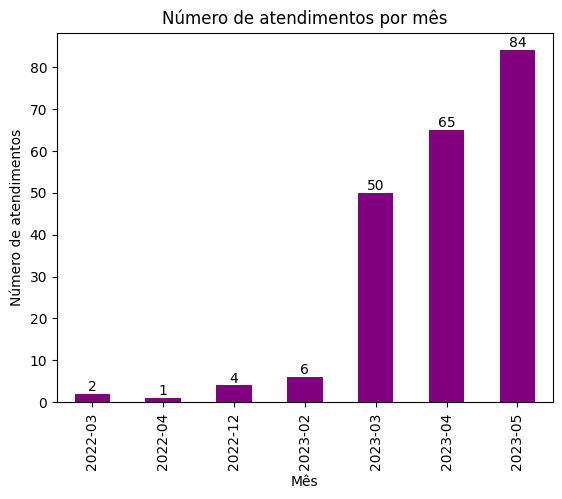

In [ ]:
# Agrupar os dados por mês e contar o número de atendimentos em cada mês
atendimentos_por_mes = df2.groupby(df2['data'].dt.to_period('M')).size()

# Plotar o gráfico de barras
ax = atendimentos_por_mes.plot(kind='bar', color='purple')

# Adicionar anotações em cima de cada barra
for i, v in enumerate(atendimentos_por_mes):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Configurar o título e os rótulos dos eixos
plt.title('Número de atendimentos por mês')
plt.xlabel('Mês')
plt.ylabel('Número de atendimentos')

# Exibir o gráfico
plt.show()

## 2.1.1 Número de sessões realizadas por dia 

In [ ]:
df2['dia_semana'] = df2['data'].dt.day_name()


In [ ]:
atendimentos_por_dia_semana = df2.groupby('dia_semana').size()


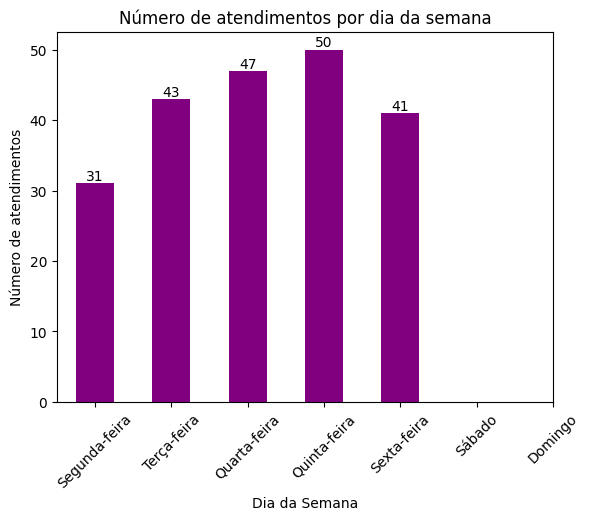

In [ ]:
# Plotar o gráfico de barras
ax = atendimentos_por_dia_semana.plot(kind='bar', color='purple')

# Adicionar anotações em cima de cada barra
for i, v in enumerate(atendimentos_por_dia_semana):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Configurar o título e os rótulos dos eixos
plt.title('Número de atendimentos por dia da semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de atendimentos')

# Definir os rótulos dos dias da semana em português
dias_semana = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo']

# Criar uma lista com os índices correspondentes aos dias da semana
indices = np.arange(len(dias_semana))

# Definir os rótulos e os locais de tick no eixo x
ax.set_xticks(indices)
ax.set_xticklabels(dias_semana, rotation=45)

# Exibir o gráfico
plt.show()


## 2.2 Distribuição dos horários de atendimento

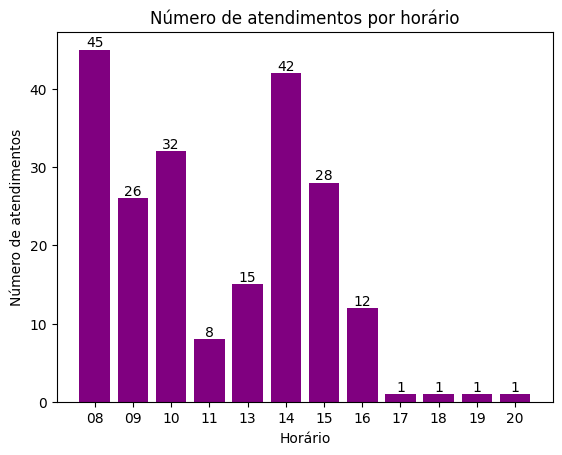

In [ ]:
# Contar o número de atendimentos para cada horário
contagem_horarios = df2['horário'].value_counts().sort_index()

# Plotar o gráfico de barras com a cor roxa
plt.bar(contagem_horarios.index, contagem_horarios.values, color='purple')

# Configurar o título e os rótulos dos eixos
plt.title('Número de atendimentos por horário')
plt.xlabel('Horário')
plt.ylabel('Número de atendimentos')

# Adicionar os valores exatos em cima de cada barra
for i, v in enumerate(contagem_horarios.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
    
# Exibir o gráfico
plt.show()

### 2.2.2 Distribuição dos atendimentos por turno 

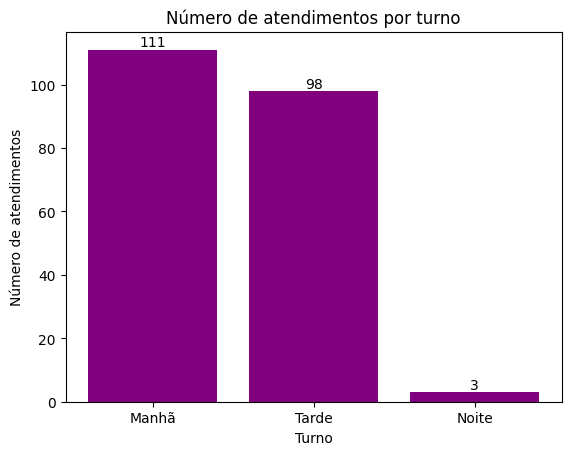

In [ ]:
# Definir os limites dos turnos
manha_inicio = 7
manha_fim = 12
tarde_inicio = 13
tarde_fim = 17
noite_inicio = 18
noite_fim = 20

# Criar listas vazias para armazenar as contagens dos turnos
contagem_manha = []
contagem_tarde = []
contagem_noite = []

# Iterar sobre os horários e contar o número de atendimentos para cada turno
for horario, contagem in contagem_horarios.items():
    horario = int(horario)
    if manha_inicio <= horario <= manha_fim:
        contagem_manha.append(contagem)
    elif tarde_inicio <= horario <= tarde_fim:
        contagem_tarde.append(contagem)
    elif noite_inicio <= horario <= noite_fim:
        contagem_noite.append(contagem)

# Criar as etiquetas dos turnos
etiquetas_turnos = ['Manhã', 'Tarde', 'Noite']

# Criar os valores para o eixo x
eixo_x = range(len(etiquetas_turnos))

# Criar os valores para o eixo y
valores_y = [sum(contagem_manha), sum(contagem_tarde), sum(contagem_noite)]

# Plotar o gráfico de barras com a cor roxa
plt.bar(eixo_x, valores_y, color='purple')

# Configurar os rótulos dos eixos e o título
plt.xlabel('Turno')
plt.ylabel('Número de atendimentos')
plt.title('Número de atendimentos por turno')

# Adicionar os valores exatos em cima de cada barra
for i, v in enumerate(valores_y):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Configurar os rótulos do eixo x
plt.xticks(eixo_x, etiquetas_turnos)

# Exibir o gráfico
plt.show()

## 2.3 Distribuição dos atendimentos por estado

In [ ]:
# Concatenar as colunas em uma única série
estado_total = pd.concat([df2['estado'], df2['estado_2'], df2['estado_3'], df2['estado_4'], df2['estado_5']])

# Remover linhas com valores ausentes
estado_total = estado_total.dropna()

# Criar um novo DataFrame com a coluna "estado_total"
estado_total = pd.DataFrame({'estado_total': estado_total})

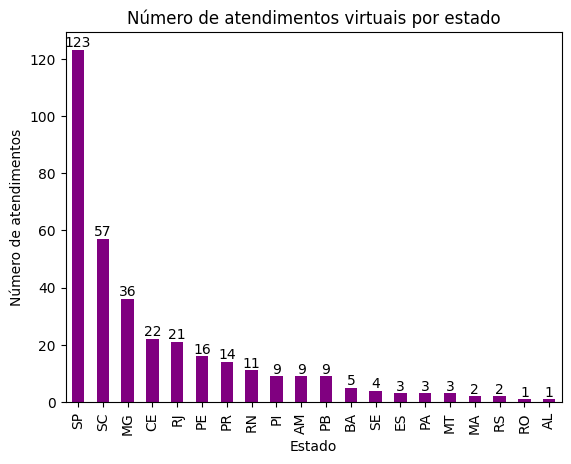

In [ ]:
# Contar a frequência de cada estado
contagem_estados = estado_total['estado_total'].value_counts()

# Plotar o gráfico de barras com a cor roxa
ax = contagem_estados.plot(kind='bar', color='purple')

# Adicionar os valores numéricos em cima das barras
for i, v in enumerate(contagem_estados):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Configurar o título e os rótulos dos eixos
plt.title('Número de atendimentos virtuais por estado')
plt.xlabel('Estado')
plt.ylabel('Número de atendimentos')

# Exibir o gráfico
plt.show()

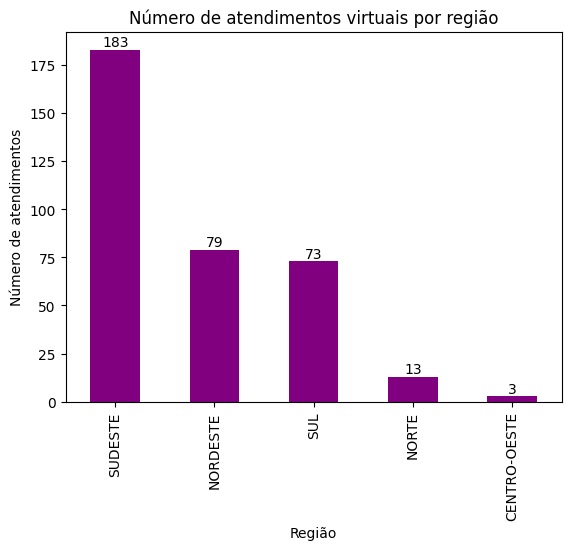

In [ ]:
# Mapear os estados para as regiões correspondentes
regioes = {
    'NORTE': ['AC', 'AP', 'AM', 'PA', 'RR', 'RO', 'TO'],
    'SUL': ['PR', 'RS', 'SC'],
    'CENTRO-OESTE': ['GO', 'MT', 'MS', 'DF'],
    'NORDESTE': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'SUDESTE': ['ES', 'MG', 'RJ', 'SP']
}

# Criar a coluna 'regiao' com base nos estados
estado_total['regiao'] = estado_total['estado_total'].map({estado: regiao for regiao, estados in regioes.items() for estado in estados})

# Contar o número de atendimentos por região
contagem_regioes = estado_total['regiao'].value_counts()

# Plotar o gráfico de barras com a cor roxa
ax = contagem_regioes.plot(kind='bar', color='purple')

# Adicionar os valores numéricos em cima das barras
for i, v in enumerate(contagem_regioes):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Configurar o título e os rótulos dos eixos
plt.title('Número de atendimentos virtuais por região')
plt.xlabel('Região')
plt.ylabel('Número de atendimentos')

# Exibir o gráfico
plt.show()

### 2.3.1 Distribuição de atendimentos por região 

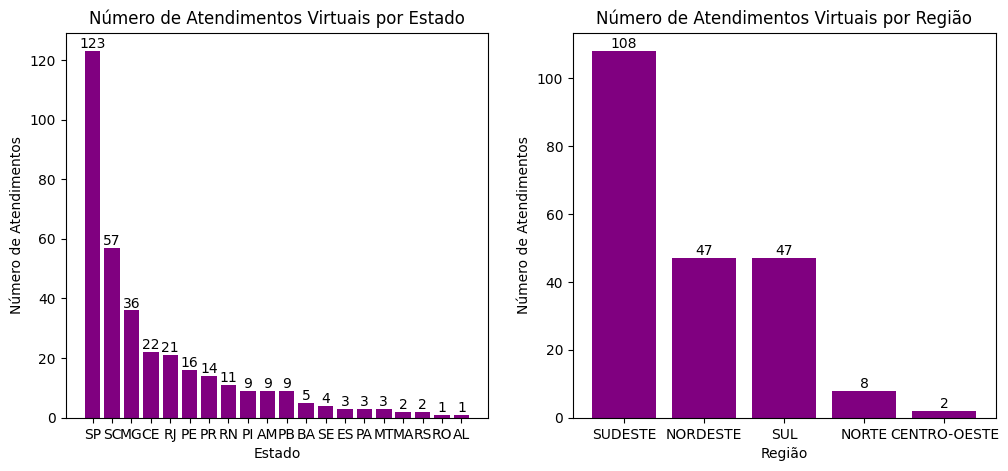

In [ ]:
# Mapear os estados para as regiões correspondentes
regioes = {
    'NORTE': ['AC', 'AP', 'AM', 'PA', 'RR', 'RO', 'TO'],
    'SUL': ['PR', 'RS', 'SC'],
    'CENTRO-OESTE': ['GO', 'MT', 'MS', 'DF'],
    'NORDESTE': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'SUDESTE': ['ES', 'MG', 'RJ', 'SP']
}

# Criar a coluna 'regiao' com base nos estados
df2['regiao'] = df2['estado'].map({estado: regiao for regiao, estados in regioes.items() for estado in estados})

# Contar o número de atendimentos por região
contagem_regioes = df2['regiao'].value_counts()

# Plotar os gráficos de barras

# Distribuição de Atendimentos por Estado
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].bar(contagem_estados.index, contagem_estados.values, color='purple')
for i, v in enumerate(contagem_estados):
    ax[0].text(i, v, str(v), ha='center', va='bottom')

ax[0].set_title('Número de Atendimentos Virtuais por Estado')
ax[0].set_xlabel('Estado')
ax[0].set_ylabel('Número de Atendimentos')

# Distribuição de Atendimentos por Região
ax[1].bar(contagem_regioes.index, contagem_regioes.values, color='purple')
for i, v in enumerate(contagem_regioes):
    ax[1].text(i, v, str(v), ha='center', va='bottom')

ax[1].set_title('Número de Atendimentos Virtuais por Região')
ax[1].set_xlabel('Região')
ax[1].set_ylabel('Número de Atendimentos')

# Exibir os gráficos no Streamlit
plt.show()

## 2.4 Distrubuição de atendimentos por município 

In [ ]:
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz
import unicodedata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Concatenar as colunas em uma única série
municipio_total = pd.concat([df2['municipio'], df2['municipio_2'], df2['municipio_3'], df2['municipio_4'], df2['municipio_5']])

# Remover linhas com valores ausentes
municipio_total = municipio_total.dropna()

# Criar um novo DataFrame com a coluna "municipio_total"
municipio_total = pd.DataFrame({'municipio_total': municipio_total})

# Limpar e padronizar os valores da coluna 'municipio_total'
municipio_total['municipio_total'] = municipio_total['municipio_total'].str.lower().str.strip()

def remover_acentos(texto):
    texto = unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('utf-8')
    return texto

municipio_total['municipio_total'] = municipio_total['municipio_total'].apply(remover_acentos)

# Concatenar estado e municipio
concatenado = pd.concat([estado_total['estado_total'], municipio_total['municipio_total']], axis=1)

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Função para atualizar o gráfico quando o estado selecionado é alterado
def atualizar_grafico(change):
    with output:
        clear_output(wait=True)
        estado_selecionado = dropdown_estado.value

        # Filtrar os dados para o estado selecionado
        dados_estado = concatenado[concatenado['estado_total'] == estado_selecionado]

        # Contar o número de atendimentos por município
        contagem_municipio = dados_estado['municipio_total'].value_counts()

        # Plotar o gráfico de barras
        plt.clf()  # Limpar o gráfico anterior
        ax = contagem_municipio.plot(kind='bar', color='purple')
        plt.xlabel('Município')
        plt.ylabel('Número de Atendimentos')
        plt.title(f'Atendimentos por Município - {estado_selecionado}')

        # Exibir o número de atendimentos acima de cada barra
        for p in ax.patches:
            ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

        plt.show()

# Criar o dropdown com as opções de estado
dropdown_estado = widgets.Dropdown(options=concatenado['estado_total'].unique(), description='Estado:')

# Registrar a função de atualização do gráfico para o evento on_change do dropdown
dropdown_estado.observe(atualizar_grafico, names='value')

# Criar uma saída para exibir o gráfico
output = widgets.Output()

# Exibir o dropdown e a saída
display(dropdown_estado, output)

# Exibir o gráfico inicial
atualizar_grafico(None)


Dropdown(description='Estado:', options=('MG', 'SP', 'PI', 'SE', 'CE', 'PR', 'PE', 'SC', 'RJ', 'MA', 'RN', 'AM…

Output()

## 2.5 Distribuição dos atendimentos entre zona Urbana e Rural

In [ ]:
# Concatenar as colunas em uma única série
urbana_rural = pd.concat([df2['urbana_rural'], df2['urbana_rural_2'], df2['urbana_rural_3'], df2['urbana_rural_4'], df2['urbana_rural_5']])

# Remover linhas com valores ausentes
urbana_rural = urbana_rural.dropna()

# Criar um novo DataFrame com a coluna "urbana_rural"
urbana_rural = pd.DataFrame({'urbana_rural': urbana_rural})

# Concatenar estado e zona
concat_estado_zona = pd.concat([estado_total['estado_total'], urbana_rural['urbana_rural']], axis=1)

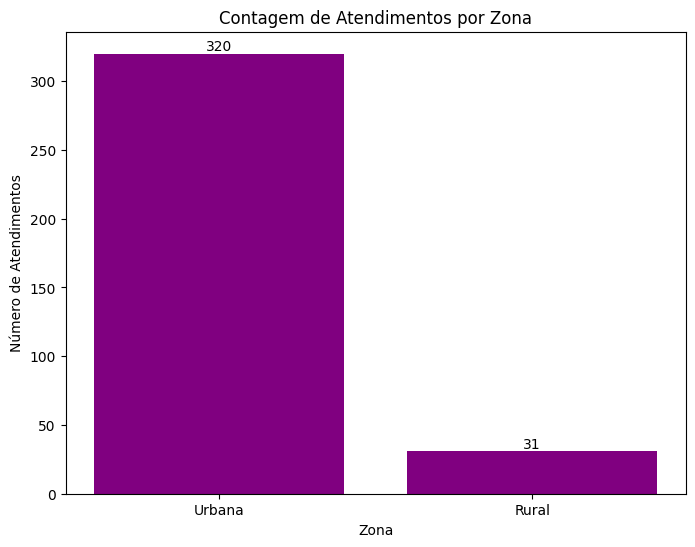

In [ ]:
# Calcular a contagem de atendimentos em zona rural e urbana
contagem = concat_estado_zona['urbana_rural'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(contagem.index, contagem.values, color='purple')

# Adicionar o número de atendimentos em cima das barras
for i, valor in enumerate(contagem.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Configurar os rótulos e o título do gráfico
plt.xlabel('Zona')
plt.ylabel('Número de Atendimentos')
plt.title('Contagem de Atendimentos por Zona')

# Exibir o gráfico
plt.show()

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Função para atualizar o gráfico quando o estado selecionado é alterado
def atualizar_grafico(change):
    with output:
        clear_output(wait=True)
        estado_selecionado = dropdown_estado.value

        # Filtrar os dados para o estado selecionado
        dados_estado = concat_estado_zona[concat_estado_zona['estado_total'] == estado_selecionado]

        # Contar o número de atendimentos em zona rural e urbana
        contagem_zona = dados_estado['urbana_rural'].value_counts()

        # Plotar o gráfico de barras
        plt.clf()  # Limpar o gráfico anterior
        ax = contagem_zona.plot(kind='bar', color='purple')
        plt.xlabel('Zona')
        plt.ylabel('Número de Atendimentos')
        plt.title(f'Distribuição de Atendimentos por Zona - {estado_selecionado}')

        # Exibir o número de atendimentos acima de cada barra
        for p in ax.patches:
            ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

        plt.show()

# Criar o dropdown com as opções de estado
dropdown_estado = widgets.Dropdown(options=concat_estado_zona['estado_total'].unique(), description='Estado:')

# Registrar a função de atualização do gráfico para o evento on_change do dropdown
dropdown_estado.observe(atualizar_grafico, names='value')

# Criar uma saída para exibir o gráfico
output = widgets.Output()

# Exibir o dropdown e a saída
display(dropdown_estado, output)

# Exibir o gráfico inicial
atualizar_grafico(None)


Dropdown(description='Estado:', options=('MG', 'SP', 'PI', 'SE', 'CE', 'PR', 'PE', 'SC', 'RJ', 'MA', 'RN', 'AM…

Output()

## 2.6 Distribuição de atendimento entre instituições público e privada

In [ ]:
# Concatenar as colunas em uma única série
publico_privada = pd.concat([df2['publico_privada'], df2['publico_privada_2'], df2['publica_privada_3'], df2['publica_privada_4'], df2['publico_privada_5']])

# Remover linhas com valores ausentes
publico_privada = publico_privada.dropna()

# Criar um novo DataFrame com a coluna "publico_privada"
publico_privada = pd.DataFrame({'publico_privada': publico_privada})

# Concatenar estado e tipo de instituição
concat_estado_instituicao = pd.concat([estado_total['estado_total'], publico_privada['publico_privada']], axis=1)

In [ ]:
concat_estado_instituicao

,estado_total,publico_privada
0,MG,Privada
1,SP,Pública
2,PI,Pública
3,PI,Pública
4,PI,Pública
...,...,...
180,RJ,Pública
181,CE,Pública
184,SP,Pública
195,RJ,Privada


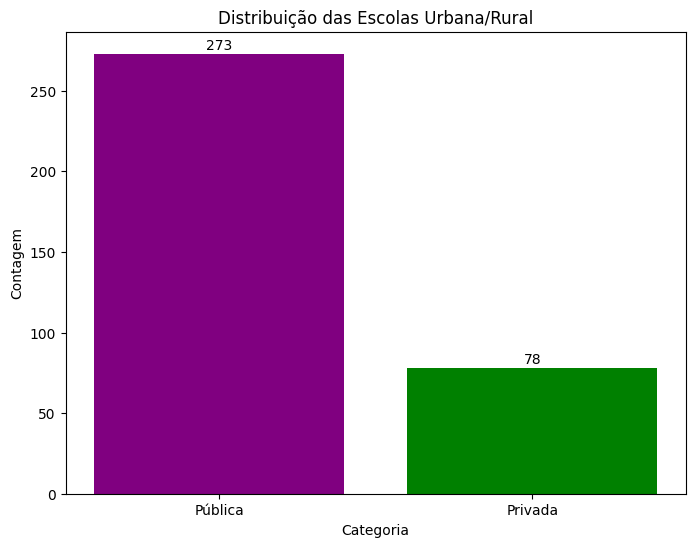

In [ ]:
contagem_publico_privada = publico_privada['publico_privada'].value_counts()

# Definir as cores das barras
cores = ['purple', 'green']

# Plotar o gráfico de barras com cores personalizadas
plt.figure(figsize=(8, 6))
plt.bar(contagem_publico_privada.index, contagem_publico_privada.values, color=cores)

# Adicionar o valor numérico em cima de cada barra
for i, v in enumerate(contagem_publico_privada.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

# Configurar título e rótulos dos eixos
plt.title('Distribuição das Escolas Urbana/Rural')
plt.xlabel('Categoria')
plt.ylabel('Contagem')

# Exibir o gráfico
plt.show()

## 2.7 Distribuição de atendimento entre os segmentos educacionais

In [ ]:
# Concatenar as colunas em uma única série
publico_privada = pd.concat([df2['publico_privada'], df2['publico_privada_2'], df2['publica_privada_3'], df2['publica_privada_4'], df2['publico_privada_5']])

# Remover linhas com valores ausentes
publico_privada = publico_privada.dropna()

# Criar um novo DataFrame com a coluna "publico_privada"
publico_privada = pd.DataFrame({'publico_privada': publico_privada})

# Concatenar estado e tipo de instituição
concat_estado_instituicao = pd.concat([estado_total['estado_total'], publico_privada['publico_privada']], axis=1)

In [216]:
# Concatenar as colunas em uma única série
segmento_total = pd.concat([df2['segmento'], df2['segmento_2'], df2['segmento_3'], df2['segmento_4'], df2['segmento_5']])

# Remover linhas com valores ausentes
segmento_total = segmento_total.dropna()

# Criar um novo DataFrame com a coluna "segmento_total"
segmento = pd.DataFrame({'segmento': segmento_total})

# Redefinir o índice do DataFrame
segmento = segmento.reset_index(drop=True)
estado_total = estado_total.reset_index(drop=True)

# Concatenar segmento e estados
segmento_estado = pd.concat([segmento, estado_total['estado_total']], axis=1)

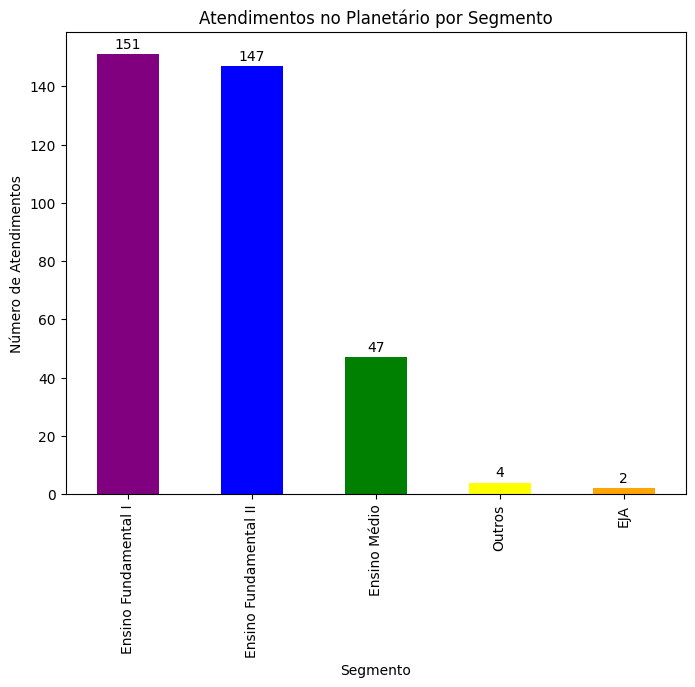

In [221]:
# Contar a frequência de cada segmento
contagem_segmento = segmento_estado['segmento'].value_counts()

# Definir uma paleta de cores
cores = ['purple', 'blue', 'green', 'yellow', 'orange']

# Plotar o gráfico de barras com cores variadas
fig, ax = plt.subplots(figsize=(8, 6))
contagem_segmento.plot(kind='bar', color=cores, ax=ax)

# Adicionar o número de atendimentos em cima de cada barra
for i, v in enumerate(contagem_segmento):
  ax.text(i, v + 1, str(v), ha='center', va='bottom')

# Configurar título e rótulos dos eixos
plt.title('Atendimentos no Planetário por Segmento')
plt.xlabel('Segmento')
plt.ylabel('Número de Atendimentos')

# Exibir o gráfico
plt.show()